<a href="https://colab.research.google.com/github/shrijanaryal16/Handwritten-digits-recognition/blob/main/Mnist_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels),(test_images,test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Normalizing the dataset:
# We should not normalize the labels because they are the values from 0 to 9. So, normalize only the images that contain the pixels.

train_images = train_images.reshape(len(train_images),28,28,1)
train_images = train_images/255.0
test_images = test_images.reshape(len(test_images),28,28,1)
test_images = test_images/255.0

In [4]:
pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.3 MB/s eta 0:00:00


In [5]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

def build_model(hp):
    model = Sequential()


    model.add(Conv2D(filters = hp.Int('conv_1_filter', min_value= 32, max_value= 128, step = 32),
                     kernel_size = hp.Choice('conv_1_kernel', values=[3,5]),
                     activation = 'relu',
                     input_shape=(28,28,1)
                     ))

    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(filters = hp.Int('conv_2_filter', min_value= 32, max_value= 128, step = 32),
                     kernel_size = hp.Choice('conv_2_kernel', values=[3,5]),
                     activation = 'relu'
                     ))

    model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())

    model.add(Dense(units= hp.Int('Dense_1_units', min_value = 32, max_value = 128, step = 32),
                    activation = 'relu'))

    model.add(Dense(10, activation = 'softmax'))


    # The learning rate of 1e-2 can be too high for CNNs. That is why we use 1e-3, 1e-4 and 1e-5
    lr = hp.Choice('learning_rate', [1e-3, 1e-4, 1e-5])

    model.compile(optimizer=keras.optimizers.Adam(lr),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [6]:
from tensorflow.keras.callbacks import EarlyStopping
from keras_tuner import RandomSearch, HyperParameters

early_stop = EarlyStopping(monitor='val_loss', patience=3, mode='min')


tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    directory='keras_tuner_dir',
    project_name='mnist'
)

# Start the search
tuner.search(
    train_images, train_labels,
    epochs=5,
    callbacks=[early_stop]
)

Trial 2 Complete [00h 00m 44s]

Best val_accuracy So Far: None
Total elapsed time: 00h 01m 43s

Search: Running Trial #3

Value             |Best Value So Far |Hyperparameter
64                |128               |conv_1_filter
5                 |5                 |conv_1_kernel
128               |64                |conv_2_filter
3                 |3                 |conv_2_kernel
128               |32                |Dense_1_units
0.001             |0.0001            |learning_rate

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9212 - loss: 0.2479
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9880 - loss: 0.0393
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9921 - loss: 0.0259
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9942 - loss: 0.0186
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9963 - loss: 0.0119


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/keras_tuner/src/engine/base_tuner.py", line 274, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.11/dist-packages/keras_tuner/src/engine/base_tuner.py", line 265, in _run_and_update_trial
    tuner_utils.convert_to_metrics_dict(
  File "/usr/local/lib/python3.11/dist-packages/keras_tuner/src/engine/tuner_utils.py", line 132, in convert_to_metrics_dict
    [convert_to_metrics_dict(elem, objective) for elem in results]
  File "/usr/local/lib/python3.11/dist-packages/keras_tuner/src/engine/tuner_utils.py", line 132, in <listcomp>
    [convert_to_metrics_dict(elem, objective) for elem in results]
     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/keras_tuner/src/engine/tuner_utils.py", line 145, in convert_to_metrics_dict
    best_value, _ = _get_best_value_and_best_epoch_from_history(
      

RuntimeError: Number of consecutive failures exceeded the limit of 3.
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/keras_tuner/src/engine/base_tuner.py", line 274, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.11/dist-packages/keras_tuner/src/engine/base_tuner.py", line 265, in _run_and_update_trial
    tuner_utils.convert_to_metrics_dict(
  File "/usr/local/lib/python3.11/dist-packages/keras_tuner/src/engine/tuner_utils.py", line 132, in convert_to_metrics_dict
    [convert_to_metrics_dict(elem, objective) for elem in results]
  File "/usr/local/lib/python3.11/dist-packages/keras_tuner/src/engine/tuner_utils.py", line 132, in <listcomp>
    [convert_to_metrics_dict(elem, objective) for elem in results]
     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/keras_tuner/src/engine/tuner_utils.py", line 145, in convert_to_metrics_dict
    best_value, _ = _get_best_value_and_best_epoch_from_history(
                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/keras_tuner/src/engine/tuner_utils.py", line 116, in _get_best_value_and_best_epoch_from_history
    objective_value = objective.get_value(metrics)
                      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/keras_tuner/src/engine/objective.py", line 59, in get_value
    return logs[self.name]
           ~~~~^^^^^^^^^^^
KeyError: 'val_accuracy'


In [7]:
model = tuner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 24, 24, 128)         │           3,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 10, 10, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │          51,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 128,682 (502.66 KB)

 Trainable params: 128,682 (502.66 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.fit(train_images, train_labels, epochs=3, validation_split=0.1, initial_epoch=2)

Epoch 3/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9863 - loss: 0.0439 - val_accuracy: 0.9893 - val_loss: 0.0397


In [10]:
import numpy as np
from sklearn.metrics import accuracy_score
predicted_labels = model.predict(test_images)
predicted_labels = np.argmax(predicted_labels, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [11]:
# test_labels = np.argmax(test_labels, axis=1)
print(predicted_labels.shape)
print(test_labels.shape)

(10000,)
(10000,)


In [12]:
accuracy = accuracy_score(test_labels, predicted_labels)
print("Accuracy:", accuracy)

Accuracy: 0.9874


In [ ]:
# The ImageDataGenerator can be used for data augmentation. Here, we are not using it since the model is trained on enough data and is generating good accuracy scores.
# However, these are the codes for data augmentation- in case it is needed:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator(
#     rotation_range=10,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     zoom_range=0.1
# )
# datagen.fit(x_train)

Now, we will try to print out the outputs of an image at different layers. Firstly we will print it out for the first layer, then the maxpool layer, second 2D layer, second max-pool layer.

In [13]:
# Let's try visualizing how the model performs after each layer
test_image = test_images[0:1]
true_label = test_labels[0]

In [15]:
from tensorflow.keras.models import Model
model = tuner.get_best_models(num_models=1)[0]
model.build(input_shape=(None, 28, 28, 1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Now, we will allow the user to input the images of their handwritten numerals and let them check what the model will predict.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


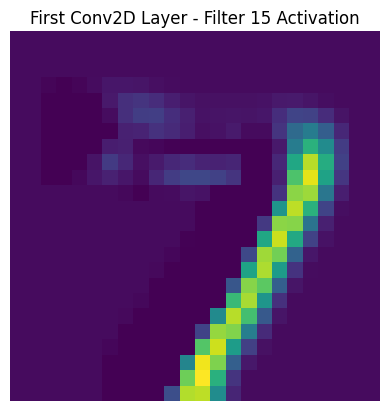

In [23]:
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

first_layer = model.layers[0]

# A new model that maps input to first layer's output
input_tensor = Input(shape=(28, 28, 1))  # Explicitly define input shape
output_tensor = first_layer(input_tensor)
layer_model = Model(inputs=input_tensor, outputs=output_tensor)

# Predict on test image
activations = layer_model.predict(test_images[0:1])  # Shape: (1, 26, 26, filters)

# 15th filter's activation
plt.imshow(activations[0, :, :, 14], cmap='viridis')  # 14 = 15th filter
plt.title('First Conv2D Layer - Filter 15 Activation')
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


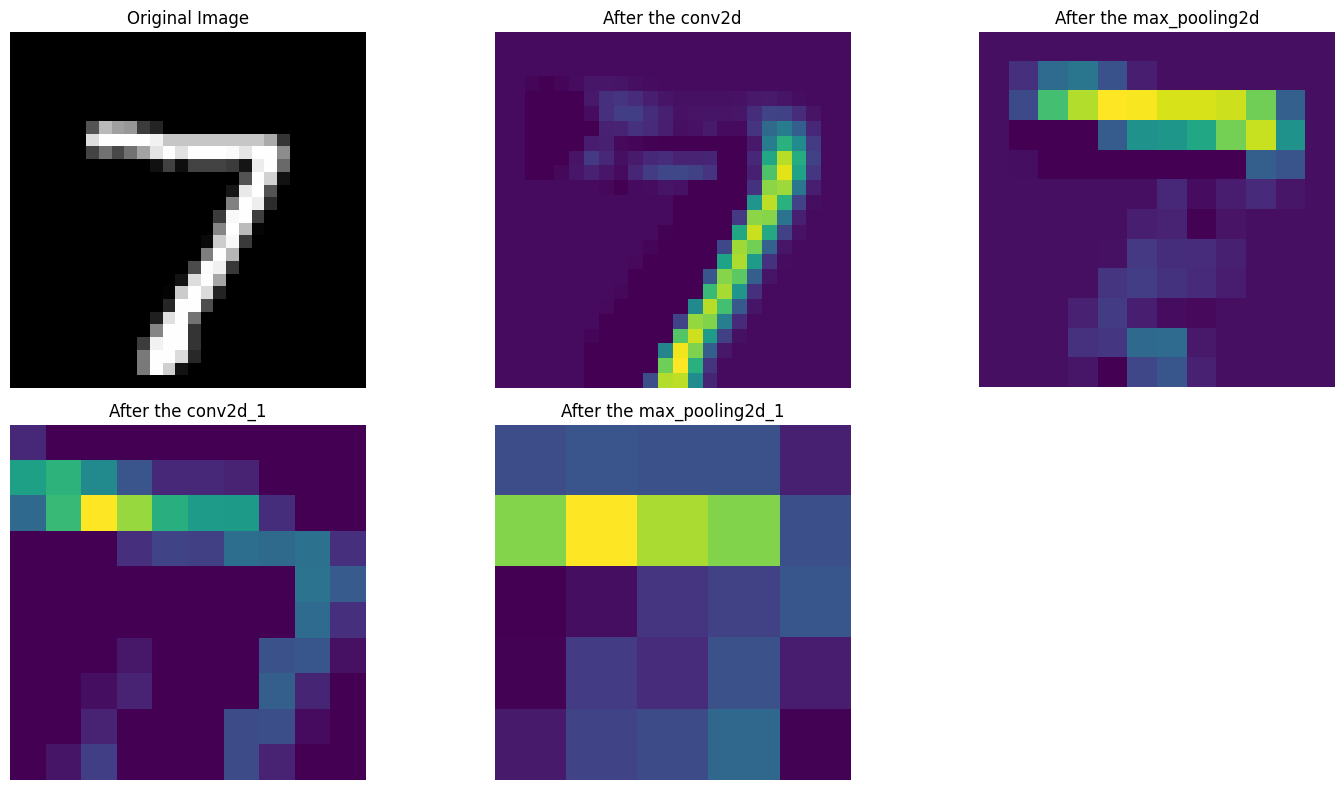

In [28]:
# Now, we are creating the visualizations for each layers.

import tensorflow as tf
import matplotlib.pyplot as plt


# Our test image is the first image from the testing set
test_image = test_images[0:1]  # Shape: (1, 28, 28, 1)

# A list of layers to visualize
layers_to_visualize = [
    model.layers[0],  # First Conv2D layer
    model.layers[1],  # First MaxPooling layer
    model.layers[2],  # Second Conv2D layer
    model.layers[3]   # Second MaxPooling layer
]

# Plot the original image
plt.figure(figsize=(15, 8))
plt.subplot(2, 3, 1)
plt.imshow(test_image[0, :, :, 0], cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Processing and plotting
current_image = test_image

for i, layer in enumerate(layers_to_visualize):
    # Create a tiny model for just this layer
    input_layer = tf.keras.Input(shape=current_image.shape[1:])  # Input shape matches current image
    output_layer = layer(input_layer)  # After applying input to that respective layer, we get output
    #Input and output are passed to build the model
    layer_model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

    # Predicting through the current layer
    current_image = layer_model.predict(current_image)

    # Plot the output
    plt.subplot(2, 3, i+2)
    if 'conv2d' in layer.name:
        plt.imshow(current_image[0, :, :, 14], cmap='viridis')  # 15th filter
    else:
        plt.imshow(current_image[0, :, :, 0], cmap='viridis')   # First channel
    plt.title(f"After the {layer.name}")
    plt.axis('off')

plt.tight_layout()
plt.show()

NOw, we will create a functionality where the user can input the image of their hand written numeral and upload it and test it on the model to see what it predicts.
This feature might work well when the user provided input image is similar in format and the style of image in which the model is trained on.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving mnist_4.jpg to mnist_4.jpg


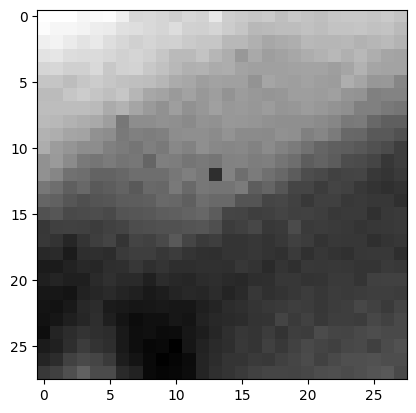

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Loading the image
image = cv2.imread('test_image.jpg', cv2.IMREAD_GRAYSCALE)

# Resizing
image = cv2.resize(image, (28, 28))



# Normalize pixel values
image = image / 255.0

# Reshape for model input
image = image.reshape(1, 28, 28, 1)  # Add batch and channel dimensions

plt.imshow(image.reshape(28, 28), cmap='gray')
plt.show()


In [ ]:

# Prediction
prediction = model.predict(image)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [ ]:
predicted_digit = np.argmax(prediction)



In [ ]:

print(f'Predicted Digit: {predicted_digit}')

Predicted Digit: 8
